Case study: 'The Pumpkin Market'

Task: Determine month with the cheapest pumpkin sale price

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

#filter out pumpkin package whose unit if sale is bushel unit
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()
pumpkins.shape


(415, 26)

In [76]:
#check for missing data in current dataframe
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [77]:
#select only the columns needed from original dataframe using loc
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]
print(pumpkins)

                   Package  Low Price  High Price     Date
70    1 1/9 bushel cartons      15.00        15.0  9/24/16
71    1 1/9 bushel cartons      18.00        18.0  9/24/16
72    1 1/9 bushel cartons      18.00        18.0  10/1/16
73    1 1/9 bushel cartons      17.00        17.0  10/1/16
74    1 1/9 bushel cartons      15.00        15.0  10/8/16
...                    ...        ...         ...      ...
1738    1/2 bushel cartons      15.00        15.0  9/30/16
1739    1/2 bushel cartons      13.75        15.0  9/30/16
1740    1/2 bushel cartons      10.75        15.0  9/30/16
1741    1/2 bushel cartons      12.00        12.0  9/30/16
1742    1/2 bushel cartons      12.00        12.0  9/30/16

[415 rows x 4 columns]


In [78]:
#calculate price average; set as new column and extract month from date
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [79]:
#copy your converted data into a fresh Pandas dataframe
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
print(new_pumpkins)

      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  15.000
71        9  1 1/9 bushel cartons      18.00        18.0  18.000
72       10  1 1/9 bushel cartons      18.00        18.0  18.000
73       10  1 1/9 bushel cartons      17.00        17.0  17.000
74       10  1 1/9 bushel cartons      15.00        15.0  15.000
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  15.000
1739      9    1/2 bushel cartons      13.75        15.0  14.375
1740      9    1/2 bushel cartons      10.75        15.0  12.875
1741      9    1/2 bushel cartons      12.00        12.0  12.000
1742      9    1/2 bushel cartons      12.00        12.0  12.000

[415 rows x 5 columns]


In [80]:
# Normalize pricing to show price/bushel due to varying bushel (1/9, 1/2) e.g for 1/2, updates the 'Price' column in the new_pumpkins DataFrame by doubling the price for rows where the 'Package' column contains the string '1/2'
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


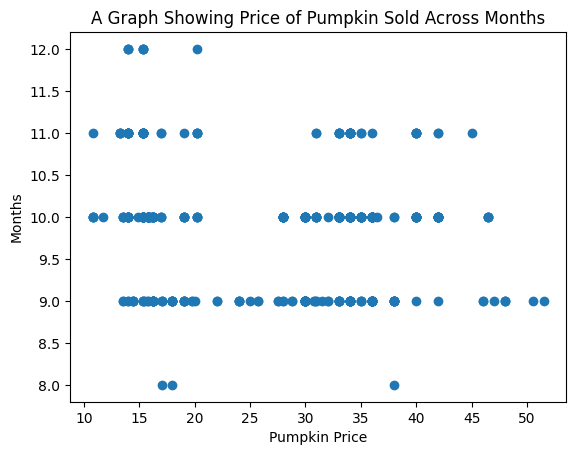

In [81]:
# visualization
price = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price, month)
plt.xlabel('Pumpkin Price')
plt.ylabel('Months')
plt.title('A Graph Showing Price of Pumpkin Sold Across Months')
plt.show()

Text(0, 0.5, 'Pumpkin Price')

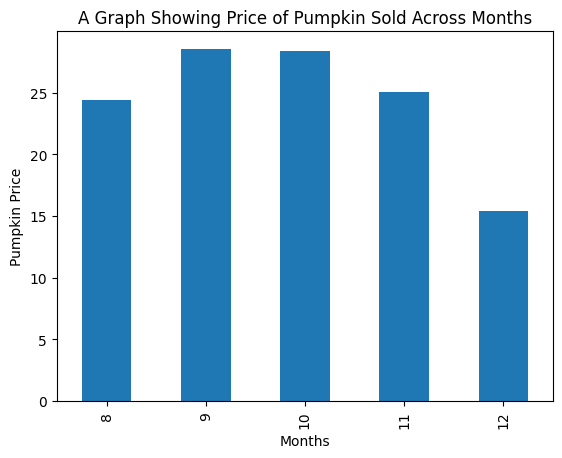

In [82]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.title('A Graph Showing Price of Pumpkin Sold Across Months')
plt.xlabel("Months")
plt.ylabel("Pumpkin Price")